<a href="https://colab.research.google.com/github/Purna29289/Machine-Learning/blob/main/AML_ImDB_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the imdb data from the keras library

In [78]:
from keras.datasets import imdb
(Train_data, Train_labels), (Test_Data, Test_labels) = imdb.load_data(num_words = 10000)

num_words will consider only the top 10000 words that are frequently used. It will remove the rarely used words. train_labels and test_labels store the binary values for positive and negative reviews as 1 and 0 respectively. This data will be transformed into feasible data as part of data preparation process

#Data Preparation

In [79]:
import numpy as np
def vector_sequence(sequences, dimension = 10000):
  output = np.zeros((len(sequences), dimension))
  for i, s in enumerate(sequences):
    output[i,s] = 1
  return output
D_train = vector_sequence(Train_data)
D_test = vector_sequence(Test_Data)
L_Train = np.asarray(Train_labels).astype('float32')
L_Test = np.asarray(Test_labels).astype('float32')

#Building the Deep Learning Model

In [80]:
from keras import models
from keras import layers

model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation="relu")),
model_1.add(layers.Dense(16, activation="relu")),
model_1.add(layers.Dense(1, activation="sigmoid"))

#Compiling the model

In [81]:
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Segregating a validation set from the data

In [84]:
D_Val = D_train[:10000]
Partial_D_train = D_train[10000:]

L_Val = L_Train[:10000]
Partial_L_Train = L_Train[10000:]

#Training the model

In [85]:
history = model_1.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5421 - accuracy: 0.7743 - val_loss: 0.4148 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3319 - accuracy: 0.9001 - val_loss: 0.3238 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2401 - accuracy: 0.9241 - val_loss: 0.2862 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1860 - accuracy: 0.9411 - val_loss: 0.2723 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1521 - accuracy: 0.9513 - val_loss: 0.2830 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1238 - accuracy: 0.9635 - val_loss: 0.2969 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1026 - accuracy: 0.9695 - val_loss: 0.3532 - val_accuracy: 0.8706
Epoch 8/20
30

#Plotting the losses of training and validation

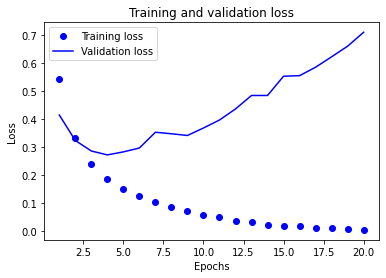

In [86]:
import matplotlib.pyplot as plt
hist_dict = history.history
values_Loss = hist_dict["loss"]
valid_loss_values = hist_dict["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting Accuracy of Training and Validation

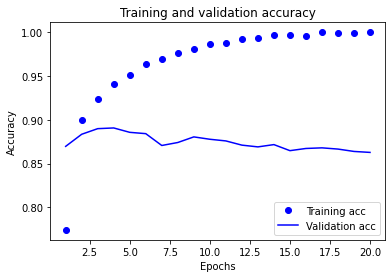

In [87]:
plt.clf()
Accuracy = hist_dict["accuracy"]
Accuracy_Val = hist_dict["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At around 4 epochs, the accuracy on the validation set is at best. We will retrain the model by considering 4 epochs only

In [88]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation="relu")),
model_1.add(layers.Dense(16, activation="relu")),
model_1.add(layers.Dense(1, activation="sigmoid"))

model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_1.fit(D_train,
            L_Train,
            epochs=4,
            batch_size=512)
result = model_1.evaluate(D_test,L_Test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4452 - accuracy: 0.8302
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2613 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2017 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8833


Loss is 0.17 and Accuracy is 0.94 with this model

In [89]:
model_1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#Trying to use one or three hidden layers, and check how doing so affects validation and test accuracy.

THREE HIDDEN LAYERS

In [90]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation="relu")),
model_2.add(layers.Dense(16, activation="relu")),
model_2.add(layers.Dense(16, activation="relu")),
model_2.add(layers.Dense(1, activation="sigmoid"))

model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5239 - accuracy: 0.7879 - val_loss: 0.3981 - val_accuracy: 0.8464
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2977 - accuracy: 0.8989 - val_loss: 0.3006 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2123 - accuracy: 0.9265 - val_loss: 0.2751 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1619 - accuracy: 0.9471 - val_loss: 0.2904 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1291 - accuracy: 0.9570 - val_loss: 0.2967 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1033 - accuracy: 0.9679 - val_loss: 0.3146 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0777 - accuracy: 0.9785 - val_loss: 0.3464 - val_accuracy: 0.8837
Epoch 8/20
30

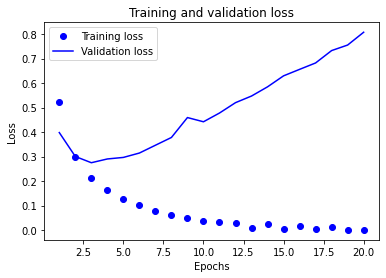

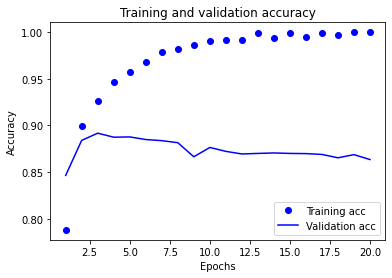

In [91]:
hist_dict2 = history_2.history
values_Loss = hist_dict2["loss"]
valid_loss_values = hist_dict2["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
Accuracy = hist_dict2["accuracy"]
Accuracy_Val = hist_dict2["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
model_2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_59 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_60 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 17        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [93]:
model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation="relu")),
model_3.add(layers.Dense(1, activation="sigmoid"))

model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_3 = model_3.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

Epoch 1/20
30/30 [==============================] - 2s 65ms/step - loss: 0.4914 - accuracy: 0.7949 - val_loss: 0.3718 - val_accuracy: 0.8783
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3012 - accuracy: 0.9064 - val_loss: 0.3277 - val_accuracy: 0.8756
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2344 - accuracy: 0.9241 - val_loss: 0.2827 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1917 - accuracy: 0.9399 - val_loss: 0.2746 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1631 - accuracy: 0.9489 - val_loss: 0.2745 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1401 - accuracy: 0.9579 - val_loss: 0.2775 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1218 - accuracy: 0.9660 - val_loss: 0.2873 - val_accuracy: 0.8867
Epoch 8/20
30

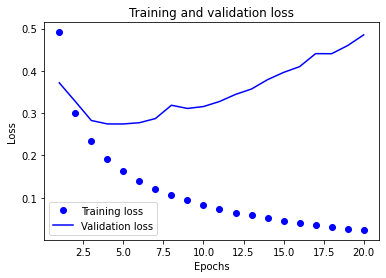

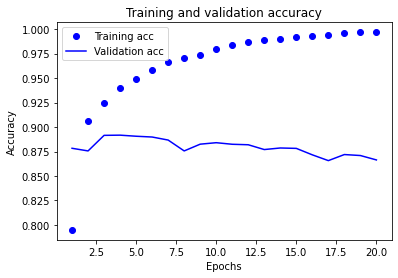

In [94]:
hist_dict3 = history_3.history
values_Loss = hist_dict3["loss"]
valid_loss_values = hist_dict3["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
Accuracy = hist_dict3["accuracy"]
Accuracy_Val = hist_dict3["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [95]:
model_3.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#Trying to use more hidden units, and check how doing so affects validation and test accuracy.

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.4820 - accuracy: 0.7759 - val_loss: 0.3342 - val_accuracy: 0.8772
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2683 - accuracy: 0.9012 - val_loss: 0.3187 - val_accuracy: 0.8688
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1896 - accuracy: 0.9335 - val_loss: 0.2748 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1556 - accuracy: 0.9439 - val_loss: 0.2864 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1171 - accuracy: 0.9611 - val_loss: 0.3137 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0925 - accuracy: 0.9697 - val_loss: 0.3305 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0758 - accuracy: 0.9742 - val_loss: 0.3641 - val_accuracy: 0.8786
Epoch 8/20
30

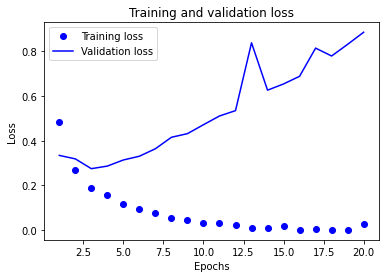

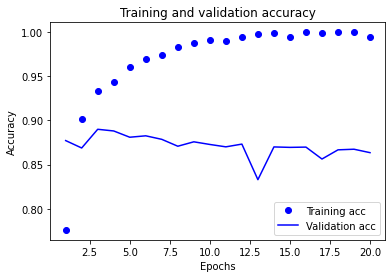

In [96]:
model_4 = models.Sequential()
model_4.add(layers.Dense(32, activation="relu")),
model_4.add(layers.Dense(64, activation="relu")),
model_4.add(layers.Dense(1, activation="sigmoid"))

model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_4 = model_4.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

hist_dict4 = history_4.history
values_Loss = hist_dict4["loss"]
valid_loss_values = hist_dict4["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
Accuracy = hist_dict4["accuracy"]
Accuracy_Val = hist_dict4["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [97]:
model_4.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_65 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 65        
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


WIth more hidden units, we see that optimal number of epochs is still at 4 . At 4 epochs the accuracy is 0.88 and the loss is 0.29

#Trying to use MSE loss function

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1651 - accuracy: 0.7711 - val_loss: 0.1057 - val_accuracy: 0.8776
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0813 - accuracy: 0.9045 - val_loss: 0.0868 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0556 - accuracy: 0.9353 - val_loss: 0.0846 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0446 - accuracy: 0.9482 - val_loss: 0.0828 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0329 - accuracy: 0.9633 - val_loss: 0.0858 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0270 - accuracy: 0.9705 - val_loss: 0.1145 - val_accuracy: 0.8491
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0207 - accuracy: 0.9781 - val_loss: 0.0939 - val_accuracy: 0.8766
Epoch 8/20
30

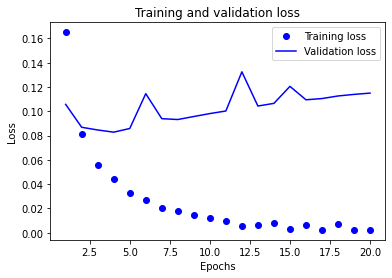

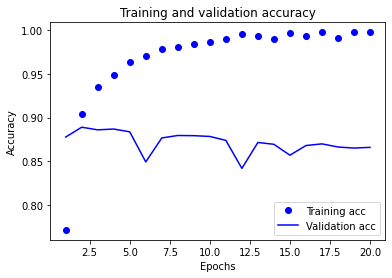

In [98]:
model_5 = models.Sequential()
model_5.add(layers.Dense(32, activation="relu")),
model_5.add(layers.Dense(64, activation="relu")),
model_5.add(layers.Dense(1, activation="sigmoid"))

model_5.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_5 = model_5.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

hist_dict5 = history_5.history
values_Loss = hist_dict5["loss"]
valid_loss_values = hist_dict5["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
Accuracy = hist_dict5["accuracy"]
Accuracy_Val = hist_dict5["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [99]:
model_5.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_68 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


#Trying to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.4508 - accuracy: 0.7926 - val_loss: 0.2996 - val_accuracy: 0.8814
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2324 - accuracy: 0.9121 - val_loss: 0.2810 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1624 - accuracy: 0.9374 - val_loss: 0.3028 - val_accuracy: 0.8806
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1296 - accuracy: 0.9506 - val_loss: 0.3477 - val_accuracy: 0.8740
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1033 - accuracy: 0.9631 - val_loss: 0.3673 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0843 - accuracy: 0.9722 - val_loss: 0.4979 - val_accuracy: 0.8637
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0637 - accuracy: 0.9761 - val_loss: 0.5858 - val_accuracy: 0.8574
Epoch 8/20
30

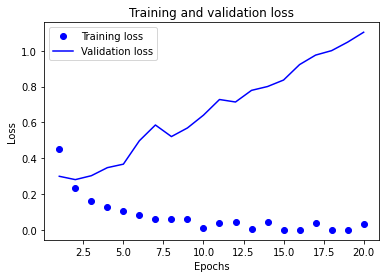

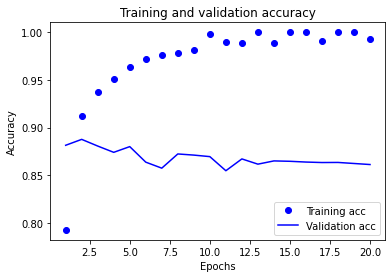

In [100]:
model_6 = models.Sequential()
model_6.add(layers.Dense(32, activation="tanh")),
model_6.add(layers.Dense(64, activation="tanh")),
model_6.add(layers.Dense(1, activation="sigmoid"))

model_6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_6 = model_6.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

hist_dict6 = history_6.history
values_Loss = hist_dict6["loss"]
valid_loss_values = hist_dict6["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
Accuracy = hist_dict6["accuracy"]
Accuracy_Val = hist_dict6["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [101]:
model_6.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_71 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 65        
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


#Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

2-hidden layer network with 32, 64 and 1 units
relu activation
dropout

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5195 - accuracy: 0.7568 - val_loss: 0.3414 - val_accuracy: 0.8764
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3017 - accuracy: 0.8869 - val_loss: 0.2879 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2163 - accuracy: 0.9209 - val_loss: 0.2727 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1721 - accuracy: 0.9369 - val_loss: 0.2803 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1340 - accuracy: 0.9533 - val_loss: 0.3047 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1002 - accuracy: 0.9661 - val_loss: 0.3238 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 0.3703 - val_accuracy: 0.8785
Epoch 8/20
30

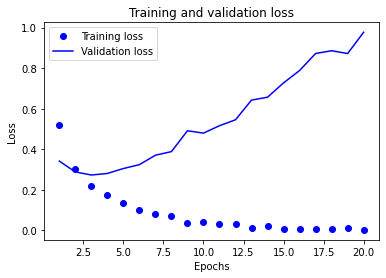

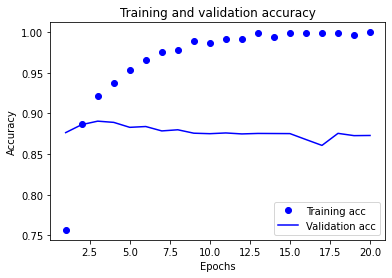

In [102]:
from tensorflow.keras.layers import Dropout
model_7 = models.Sequential()
model_7.add(layers.Dense(32, activation="relu")),
model_7.add(Dropout(0.2)),
model_7.add(layers.Dense(64, activation="relu")),
model_7.add(Dropout(0.2)),
model_7.add(layers.Dense(1, activation="sigmoid"))

model_7.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_7 = model_7.fit(Partial_D_Train,
                      Partial_L_Train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(D_Val, L_Val))

hist_dict7 = history_7.history
values_Loss = hist_dict7["loss"]
valid_loss_values = hist_dict7["val_loss"]
epochs = range(1, len(values_Loss) + 1)
plt.plot(epochs, values_Loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
Accuracy = hist_dict7["accuracy"]
Accuracy_Val = hist_dict7["val_accuracy"]
plt.plot(epochs, Accuracy, "bo", label="Training acc")
plt.plot(epochs, Accuracy_Val, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [106]:
result  = model_1.evaluate(D_test,L_Test)
model_1.summary()

782/782 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8833
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [104]:
result = model_7.evaluate(D_test, L_Test)
model_7.summary()

782/782 [==============================] - 2s 2ms/step - loss: 1.0432 - accuracy: 0.8583
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 32)                320032    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 65        
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


With dropout, the number of epochs at which the loss is minimum and accuracy is high is 3, Loss is at 1.04 and accuracy is at 0.86

#Conclusion

With Relu activation and 2 layers with 16 units, the accuracy is 0.88 where as with relu, dropout and 2 layers with 32,64 units, the accuracy has come down to 0.85. The two models widely differ in terms of loss as well where the second model has a loss at 1.04 compared to the first model whose loss is at 0.29. We would consider the first model to be much stable.